<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Transforming Excel Analysis into pandas Data Models</h1>
<h1>Advanced Excel Spreadsheets</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

import sklearn
from sklearn.linear_model import LinearRegression

import openpyxl
from openpyxl.drawing.image import Image
from openpyxl.chart import ScatterChart, Reference, Series
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 1de312ab8ec83b204e8a22ebe02393243330f40f

matplotlib: 3.3.2
numpy     : 1.19.2
openpyxl  : 3.0.5
json      : 2.0.9
pandas    : 1.1.3
sklearn   : 0.0
watermark : 2.1.0



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')

## Formulas

In [4]:
book = openpyxl.Workbook()
sheet = book.active
sheet.title = 'Formulas'

Confirm that the sheet is empty

In [5]:
sheet.dimensions

'A1:A1'

Let's add some data

In [6]:
sheet['A1'] = 'x'
sheet['B1'] = 'y'

rows = np.arange(20).reshape(10, 2)

for row in rows:
    sheet.append(list(row)) # Rows have to be lists or tuples

In [7]:
sheet.dimensions

'A1:B11'

Now we're going to a simple formula for the totals at the bottom of the values we just added

In [8]:
sheet['A12'] = "=SUM(A2:A11)"
sheet['B12'] = "=SUM(B2:B11)"

And finally we can save our new workbooks

In [9]:
book.save('data/Advanced.xlsx')

In [10]:
!open data/Advanced.xlsx

In [11]:
sheet['B12'].value

'=SUM(B2:B11)'

All the function names that openpyxl knowns about

In [12]:
print(openpyxl.utils.FORMULAE)

frozenset({'RANK', 'IMAGINARY', 'AREAS', 'INDEX', 'SUMXMY2', 'ACCRINT', 'ISEVEN', 'MINVERSE', 'TINV', 'LEFT', 'LN', 'DSUM', 'T', 'CELL', 'RIGHT', 'TRIMMEAN', 'AVERAGE', 'COUPNCD', 'TBILLPRICE', 'DEC2BIN', 'KURT', 'DOLLARDE', 'CHAR', 'BETADIST', 'ROWS', 'YEAR', 'N', 'ISREF', 'DURATION', 'EDATE', 'TRANSPOSE', 'RAND', 'CUMIPMT', 'ODDFYIELD', 'IMARGUMENT', 'DISC', 'FLOOR', 'HEX2BIN', 'CUMPRINC', 'DVARP', 'VARPA', 'POISSON', 'LOGEST', 'ASIN', 'MIRR', 'ODDFPRICE', 'HLOOKUP', 'CONCATENATE', 'DCOUNT', 'ATANH', 'TODAY', 'SUBTOTAL', 'HYPERLINK', 'BESSELI', 'AMORLINC', 'VALUE', 'CUBESET', 'COUPDAYS', 'EOMONTH', 'AVERAGEIF', 'COUNTBLANK', 'DDB', 'ERFC', 'FIND', 'IPMT', 'COS', 'COUPDAYSNC', 'SLN', 'GESTEP', 'MINUTE', 'FINV', 'BIN2OCT', 'REPLACE', 'LOGINV', 'PROB', 'WORKDAY.INTL', 'VAR', 'TYPE', 'MATCH', 'DOLLARFR', 'PEARSON', 'DATEDIF', 'MAX', 'NEGBINOMDIST', 'DGET', 'DMAX', 'REPT', 'RTD', 'FREQUENCY', 'FDIST', 'IMCOS', 'CHIINV', 'SUMPRODUCT', 'OCT2HEX', 'TBILLYIELD', 'COMPLEX', 'ODDLPRICE', 'YIELD

## Images

Now we will create a new worksheet where we will add a few images

In [13]:
sheet = book.create_sheet(title='Images')

In [14]:
sheet['A1'] = 'Our logo'

In [15]:
img = Image('data/D4Sci_logo_full.png')

In [16]:
sheet.add_image(img, 'B1')

In [17]:
book.save('data/Advanced.xlsx')

In [18]:
!open data/Advanced.xlsx

Now let's try doing something slightly more useful. We'll read a data file from disk, perform a linear fit, generate a plot and add it to the workshet

In [19]:
data = pd.read_csv('data/Anscombe1.dat', header=None, sep=' ')

In [20]:
data.shape

(11, 2)

In [21]:
sheet['A31'] = 'X'
sheet['B31'] = 'Y'

In [22]:
for x, y in data.values:
    sheet.append((x, y))

In [23]:
lm = LinearRegression()
lm.fit(data[[0]], data[[1]])

LinearRegression()

In [24]:
y2 = lm.predict(data[[0]])

In [25]:
lm.coef_

array([[0.50009091]])

In [26]:
lm.intercept_

array([3.00009091])

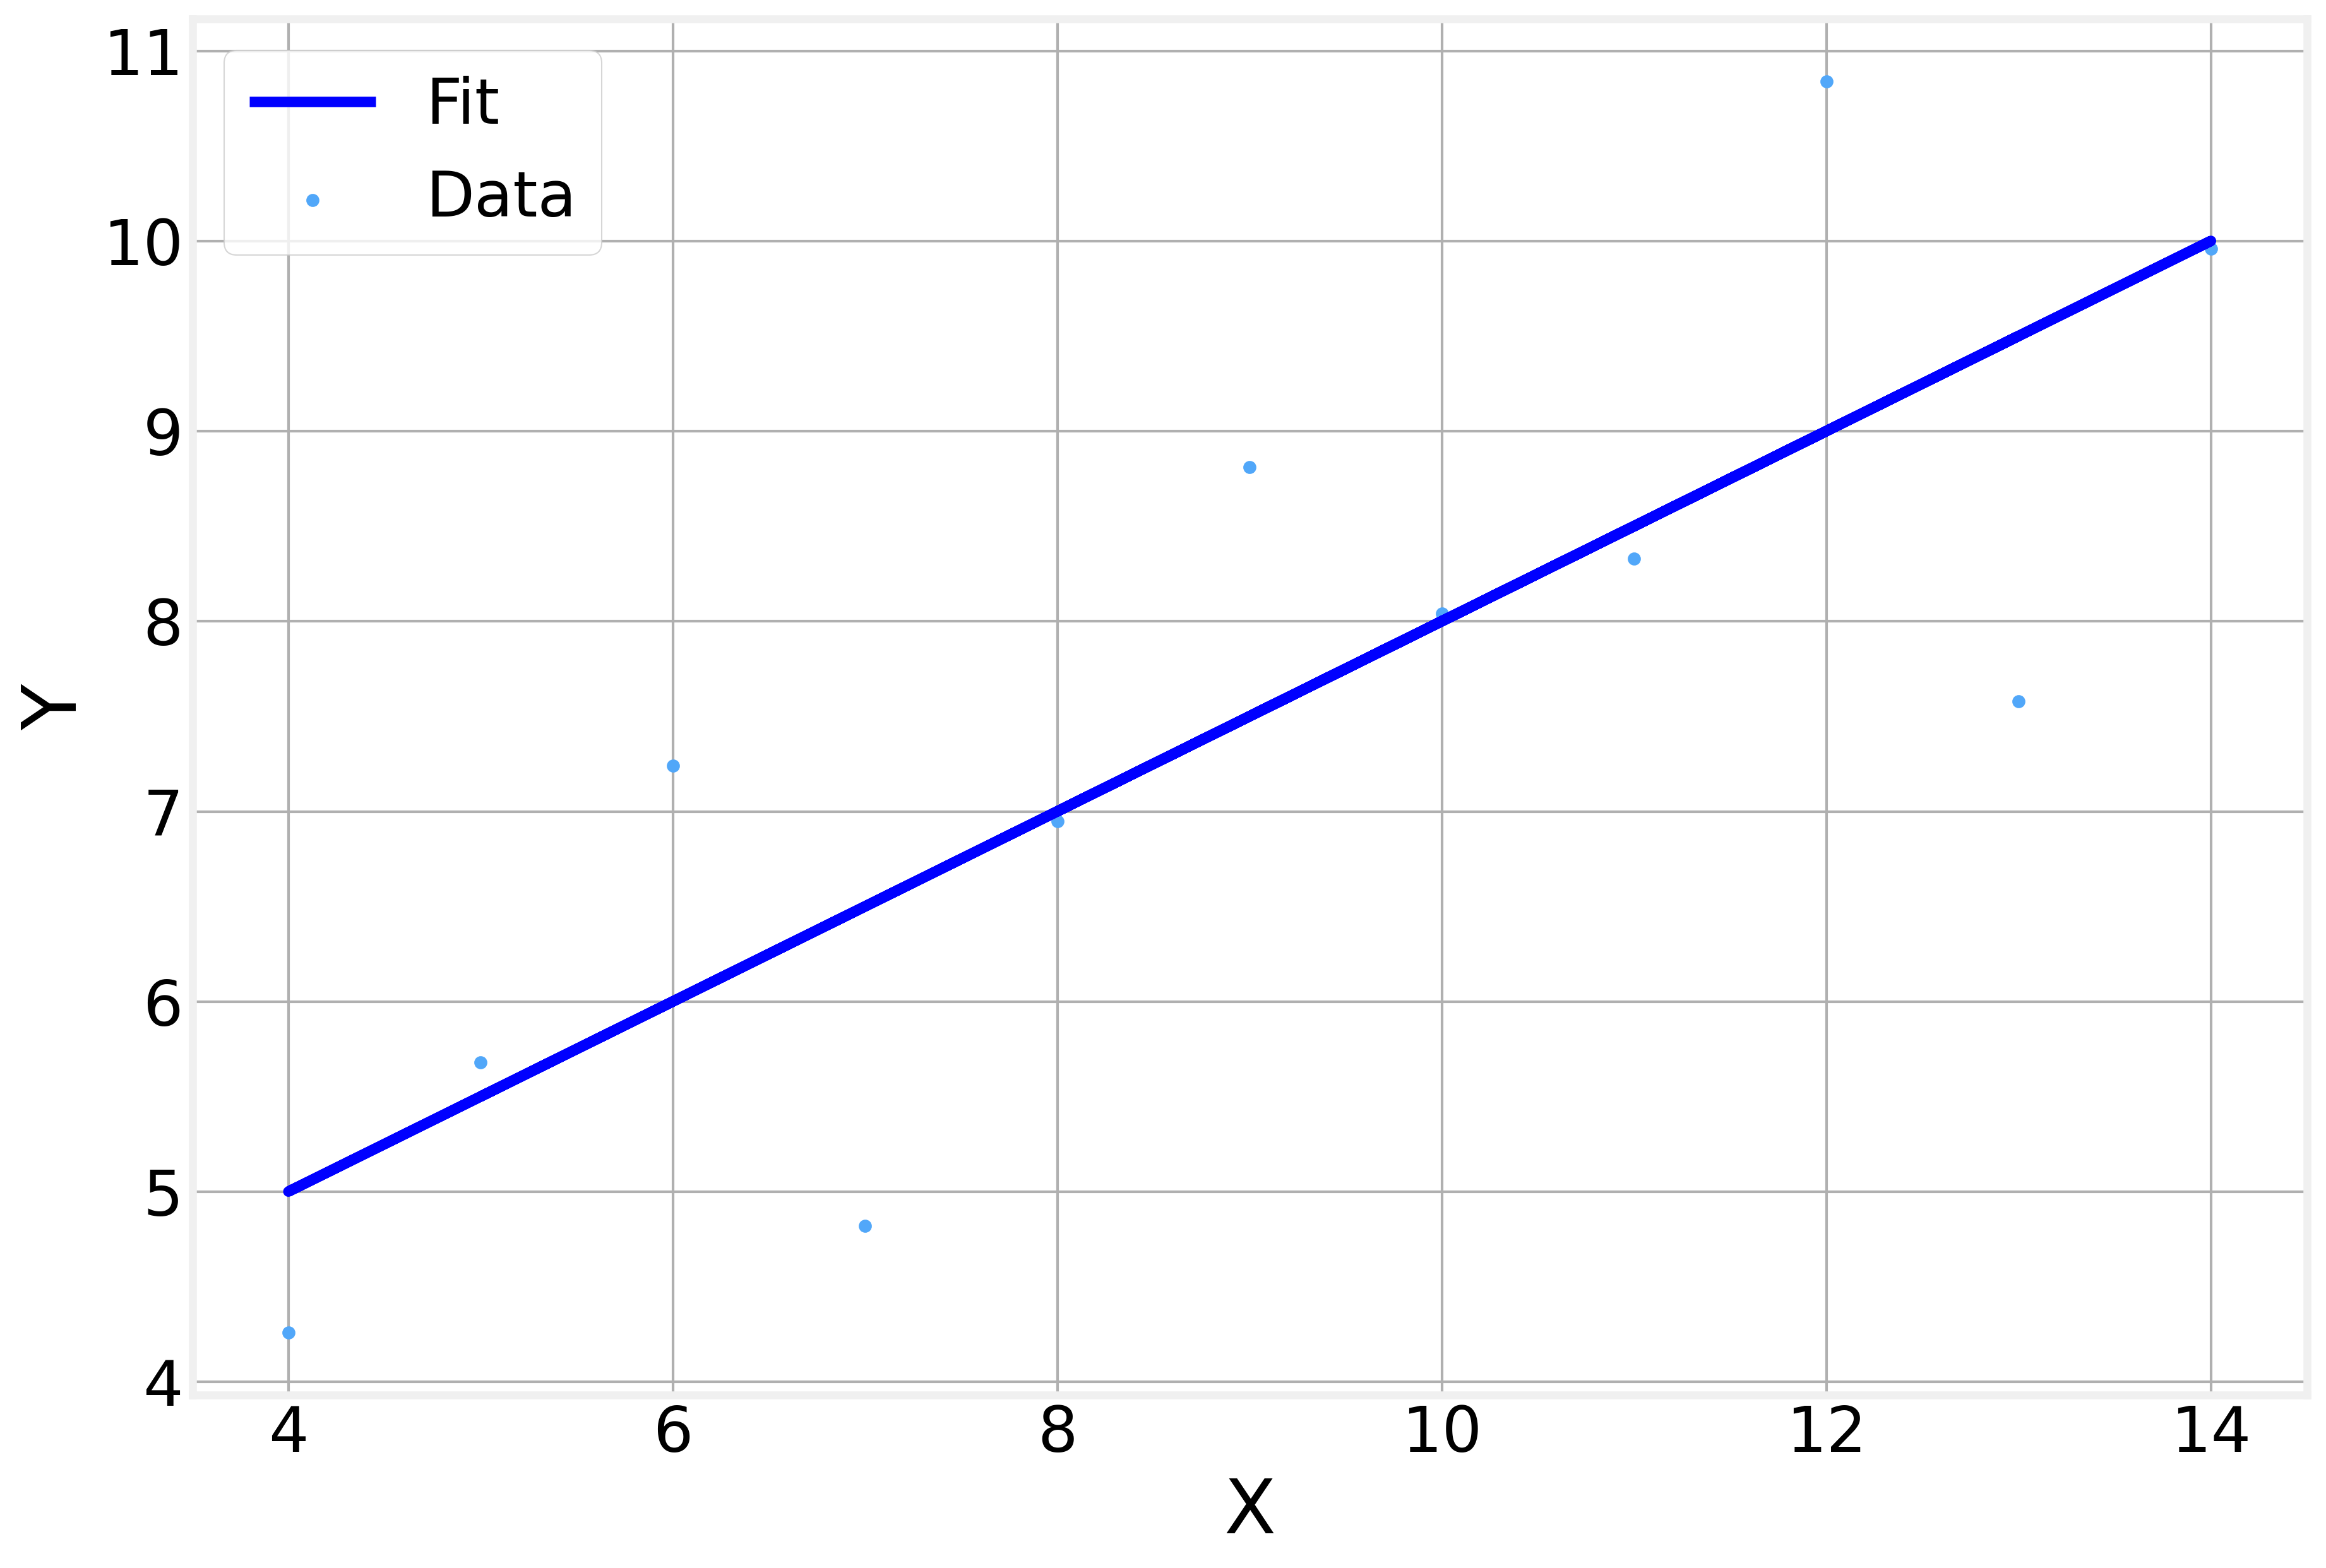

In [27]:
ax = data.plot.scatter(x=0, y=1, label='Data')
ax.plot(data[0], y2, c='b', label='Fit')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.savefig('data/Anscombe.png', dpi=72)

And now we can add it to the worksheet

In [28]:
!open data/Anscombe.png

In [29]:
img = Image('data/Anscombe.png')

In [30]:
sheet.add_image(img, 'D31')

In [31]:
book.save('data/Advanced.xlsx')

In [32]:
!open data/Advanced.xlsx

## Charts

In [33]:
sheet = book.create_sheet(title="Charts")

In [34]:
data

,0,1
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [35]:
data[2] = y2

In [36]:
data

,0,1,2
0,10.0,8.04,8.001000
1,8.0,6.95,7.000818
2,13.0,7.58,9.501273
3,9.0,8.81,7.500909
4,11.0,8.33,8.501091
5,14.0,9.96,10.001364
6,6.0,7.24,6.000636
7,4.0,4.26,5.000455
8,12.0,10.84,9.001182
9,7.0,4.82,6.500727


In [37]:
sheet['A1'] = 'X'
sheet['B1'] = 'Y'
sheet['C1'] = 'Fit'

for x, y, z in data.values:
    sheet.append((x, y, z))

In [38]:
chart = ScatterChart()
chart.title = "Line Chart"
chart.y_axis.title = 'Y'
chart.x_axis.title = 'X'

In [39]:
# X-values start in row 2 to skip the column title
x_ref = Reference(sheet, min_col=1, min_row=2, max_row=12)

# y-values start in row 1 to include the column title
y_ref = Reference(sheet,  min_col=2, min_row=1, max_row=12)
y2_ref = Reference(sheet, min_col=3, min_row=1, max_row=12)

In [40]:
series_y  = Series(values=y_ref,  xvalues=x_ref, title_from_data=True)#, title='Y')
series_y2 = Series(values=y2_ref, xvalues=x_ref, title_from_data=True)#, title='Fit')

In [41]:
series_y.graphicalProperties.line.noFill = True
series_y.marker.symbol = 'square'

In [42]:
chart.series

[]

In [43]:
chart.series.append(series_y)
chart.series.append(series_y2)

In [44]:
sheet.add_chart(chart, "D1")

In [45]:
book.save('data/Advanced.xlsx')

In [46]:
!open data/Advanced.xlsx

## Pandas support

In [47]:
data

,0,1,2
0,10.0,8.04,8.001000
1,8.0,6.95,7.000818
2,13.0,7.58,9.501273
3,9.0,8.81,7.500909
4,11.0,8.33,8.501091
5,14.0,9.96,10.001364
6,6.0,7.24,6.000636
7,4.0,4.26,5.000455
8,12.0,10.84,9.001182
9,7.0,4.82,6.500727


In [48]:
data.columns = ['X', 'Y', 'Fit']

In [49]:
data

,X,Y,Fit
0,10.0,8.04,8.001000
1,8.0,6.95,7.000818
2,13.0,7.58,9.501273
3,9.0,8.81,7.500909
4,11.0,8.33,8.501091
5,14.0,9.96,10.001364
6,6.0,7.24,6.000636
7,4.0,4.26,5.000455
8,12.0,10.84,9.001182
9,7.0,4.82,6.500727


In [50]:
sheet = book.create_sheet('Pandas')

In [51]:
for row in dataframe_to_rows(data, header=True, index=True):
    sheet.append(row)

In [52]:
book.save('data/Advanced.xlsx')

In [53]:
!open data/Advanced.xlsx

And to extract the data back from a Worksheet

In [54]:
sheet.dimensions

'A1:D13'

In [55]:
new_data = np.array([row for row in sheet.values])

In [56]:
new_data

array([[None, 'X', 'Y', 'Fit'],
       [None, None, None, None],
       [0, 10.0, 8.04, 8.001000000000001],
       [1, 8.0, 6.95, 7.000818181818183],
       [2, 13.0, 7.58, 9.50127272727273],
       [3, 9.0, 8.81, 7.500909090909093],
       [4, 11.0, 8.33, 8.501090909090912],
       [5, 14.0, 9.96, 10.001363636363639],
       [6, 6.0, 7.24, 6.000636363636365],
       [7, 4.0, 4.26, 5.000454545454547],
       [8, 12.0, 10.84, 9.00118181818182],
       [9, 7.0, 4.82, 6.500727272727274],
       [10, 5.0, 5.68, 5.500545454545456]], dtype=object)

In [57]:
df = pd.DataFrame(new_data[2:], columns=new_data[0])
df.set_index(df.columns[0])

,X,Y,Fit
0,10,8.04,8.001
1,8,6.95,7.00082
2,13,7.58,9.50127
3,9,8.81,7.50091
4,11,8.33,8.50109
5,14,9.96,10.0014
6,6,7.24,6.00064
7,4,4.26,5.00045
8,12,10.84,9.00118
9,7,4.82,6.50073


# Font formatting

In [58]:
fontStyle = Font(size = "20", b=True) # Make it size 20 and Bold

In [59]:
sheet['B1'].font = fontStyle
sheet['C1'].font = fontStyle
sheet['D1'].font = fontStyle

In [60]:
book.save('data/Advanced.xlsx')

In [61]:
!open data/Advanced.xlsx

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>